In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
import math
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

In [2]:
df = pd.read_csv('Dataset.csv')

In [3]:
df1 = df.reset_index()['hourly_traffic_count']
df1 = df1.iloc[:9792,]

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
def create_dataset(dataset, window=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-window-1):
        a = dataset[i:(i+window),0]
        dataX.append(a)
        dataY.append(dataset[i+window,0])
    return np.array(dataX), np.array(dataY)

In [6]:
window = 288
X,y = create_dataset(df1,window)

In [7]:
X.shape, y.shape

((9503, 288), (9503,))

In [8]:
training_size = int(len(df1)*0.80)
test_size = len(df1)-training_size
X_train, X_test = X[0:training_size,:], X[training_size:,:]

In [9]:
X_train.shape , X_test.shape

((7833, 288), (1670, 288))

In [10]:
y_train, y_test = y[0:training_size,], y[training_size:,]

In [11]:
y_train.shape , y_test.shape

((7833,), (1670,))

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Model

In [13]:
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(288, 1)))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(32,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1))
opt_adam  = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=opt_adam ,loss='mean_squared_error')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 288, 32)           4352      
_________________________________________________________________
dropout (Dropout)            (None, 288, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 288, 32)           8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 288, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 288, 32)           8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 288, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 288, 32)           8

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
245/245 [==============================] - 238s 973ms/step - loss: 0.0198
Epoch 2/10
245/245 [==============================] - 234s 956ms/step - loss: 0.0106
Epoch 3/10
245/245 [==============================] - 218s 891ms/step - loss: 0.0091
Epoch 4/10
245/245 [==============================] - 134s 547ms/step - loss: 0.0084
Epoch 5/10
245/245 [==============================] - 133s 543ms/step - loss: 0.0078
Epoch 6/10
245/245 [==============================] - 132s 540ms/step - loss: 0.0075
Epoch 7/10
245/245 [==============================] - 134s 547ms/step - loss: 0.0071
Epoch 8/10
245/245 [==============================] - 134s 545ms/step - loss: 0.0069
Epoch 9/10
245/245 [==============================] - 132s 539ms/step - loss: 0.0068
Epoch 10/10
245/245 [==============================] - 133s 543ms/step - loss: 0.0067


In [17]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [18]:
X_test.shape

(1670, 288, 1)

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [20]:
train_predict = train_predict.astype(int)
test_predict = test_predict.astype(int)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

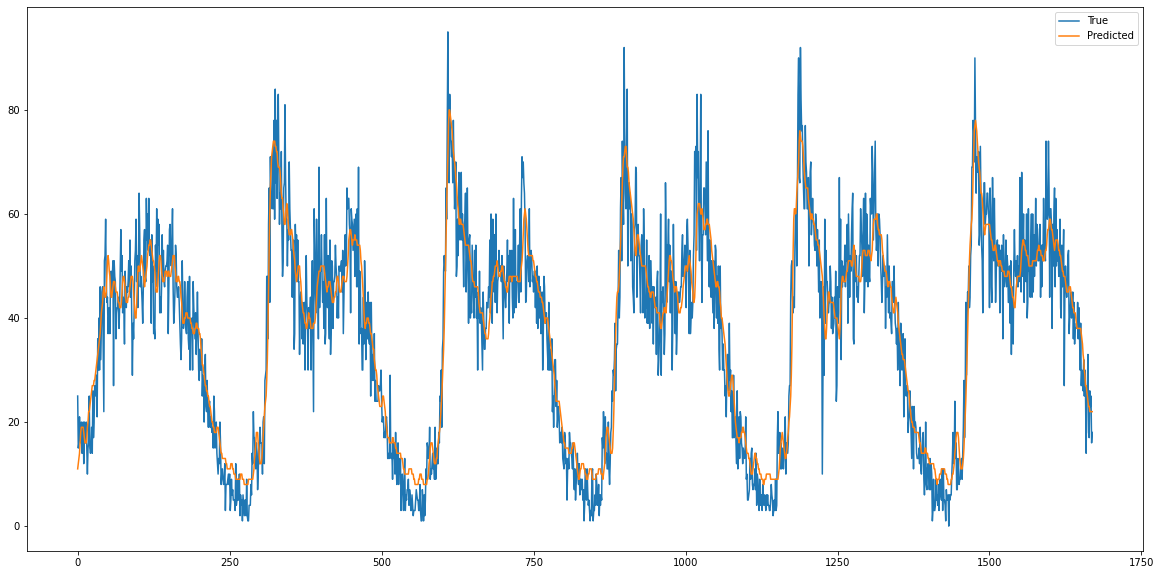

In [21]:
plt.figure(figsize=(20,10))
plt.plot(y_test, label='True')
plt.plot(test_predict, label = 'Predicted')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('RMSE-train:',math.sqrt(mean_squared_error(y_train,train_predict)))
print('MAE-train:',mean_absolute_error(y_train,train_predict))
print('R_2-train:',r2_score(y_train,train_predict))

RMSE-train: 8.503451886556316
MAE-train: 6.380441720924295
R_2-train: 0.8719710458813283


In [23]:
print('RMSE-test:',math.sqrt(mean_squared_error(y_test,test_predict)))
print('MAE-test:',mean_absolute_error(y_test,test_predict))
print('R_2-train:',r2_score(y_test,test_predict))

RMSE-test: 7.327170337156125
MAE-test: 5.755688622754491
R_2-train: 0.866449462288243
